<a href="https://colab.research.google.com/github/fabarroso/MVP1/blob/main/MVP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##          **MVP1 - Acidentes Ferroviários**

Nome: Fabio de Andrade Barroso

Matricula:4052025000158

Dataset original:

https://dados.antt.gov.br/dataset/relatorio-de-acompanhamento-de-acidentes-ferroviarios-raaf/resource/3a191a68-837b-4359-bb69-93f9b8e49ff1

Acidentes ferroviários podem causar não apenas prejuízos materiais significativos, mas também colocar em risco a vida de passageiros,
trabalhadores e comunidades próximas às linhas férreas.

A análise de dados nos permite identificar padrões, causas frequentes e fatores de risco associados, possibilitando assim a implementação de medidas preventivas e a melhoria das políticas de segurança.



**Descrição do problema**


O problema consiste em analisar e explorar os dados de acidentes ferroviários no Brasil entre dezembro de 2020 e dezembro de 2024.
O dataset contém informações como data, tipo de acidente, causa presumida, região, linha, entre outros. O objetivo é identificar padrões, causas frequentes por meio da análise de variáveis envolvidas em cada ocorrência.

**Hipóteses levantadas**


*   Existe relação entre tipo de linha e gravidade do acidente?
*   Acidentes com cargas perigosas tendem a ter mais vítimas?
*   Estados ou concessionárias específicas apresentam mais casos?
*   Existe sazonalidade (mês ou hora) na ocorrência dos acidentes?
*   Existe uma estação do ano com maior número de acidentes?
*   Certos tipos de acidentes estão mais associados à fatalidades?

**Tipo de Problema**

Este é um problema de classificação, pois, a maior parte das variáveis são categóricas, tendo como os exemplos: tipo de acidente, existencia de vitimas, gravidade; permtindo assim aplicar modelos para prever classes e tomar decisões com base em categorias.

**Importação das Bibliotecas Necessárias, Carga de Dados e Atributos do Dataset**

****
As bibliotecas escolhidas e carregadas no código foram fundamentais para realizar uma análise exploratória de dados (EDA), tornando a leitura mais eficiente, possibilitando a manipulação e limpeza, permitindo análises estatisticas e visualizações claras e informativas.

Foi utilizado pd.set_option do Pandas, evitando assim que colunas ou textos ficassem truncados, tornando a EDA mais fácil de ser compreendida.

Na carga de dados bla bla bla

delimitador csv bla bla bla

mostrando as 5 primeiras linhas
****

In [1]:
## Carga de bibliotecas utilizadas
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)

In [18]:
##Carregamento dos Dados
# URL GitHub
url = 'https://raw.githubusercontent.com/fabarroso/acidentes-ferroviarios/main/Acidentes_Ferroviarios.csv'

# Carregamento do dataset
df = pd.read_csv(url, delimiter=';', encoding='ISO-8859-1')

# Exibe colunas
print("Lista de Atributos (Colunas) do Dataset:\n")
for col in df.columns:
    print(col)

print("\n" + "-"*560 + "\n")

# Exibe as primeiras linhas
print(df.head().to_string())

Lista de Atributos (Colunas) do Dataset:

Gravidade
Concessionaria
Data_Ocorrencia
Hora_Ocorrencia
UF
Municipio
Linha
Quilômetro_Inicial
Quilômetro_Final
Estação_Anterior
Estação_Posterior
Perímetro_Urbano
Causa_direta
Causa_contibutiva
Natureza
Interrupção
N_Trem
Prefixo
Double_Stack
Serviço_Transporte
N_feridos
N_obitos
Mercadoria
Equipagem
Outra_Ferrovia
PN
Prejuízo_Financeiro

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

  Gravidade Concessionaria Data_Ocorrencia Hora_Ocorre

**Análise de Dados**

****
No bloco abaixo, o codigo "dimensão do dataset", nos ajuda a entender o tamanho do mesmo, trazendo as informações de quantos registros (acidentes) estão presentes e quantas variáveis (atributos) estão disponiveis para análises.

Nas informações do dataset será exibido os tipos de dados de cada coluna; exibe quantos valores não nulos há em cada coluna e ajuda identificar as variaveis categoricas, numericas e possiveis colunas com dados ausentes.

Na verificação de valores nulos veremos a qtde de valores ausentes por coluna e tbm será essencial para decidir se será necessário fazer o tratamento desses dados faltantes.

ajuda a entender se os dados estão com os tipos corretos (int, float, object, etc.).

mostra a distribuição das variáveis quantitativas — pode revelar outliers ou assimetrias
****

Total de linhas: 2973
Total de colunas: 27

--------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gravidade            2973 non-null   object 
 1   Concessionaria       2973 non-null   object 
 2   Data_Ocorrencia      2973 non-null   object 
 3   Hora_Ocorrencia      2973 non-null   object 
 4   UF                   2973 non-null   object 
 5   Municipio            2973 non-null   object 
 6   Linha                2973 non-null   object 
 7   Quilômetro_Inicial   2973 non-null   float64
 8   Quilômetro_Final     2927 non-null   float64
 9   Estação_Anterior     2973 non-null   object 
 10  Estação_Posterior    2973 non-null   object 
 11  Perímetro_Urbano     2973 non-null   object 
 12  Causa_direta         2973 non-null   object 
 13  Causa_contibutiva    2906 non-null   objec

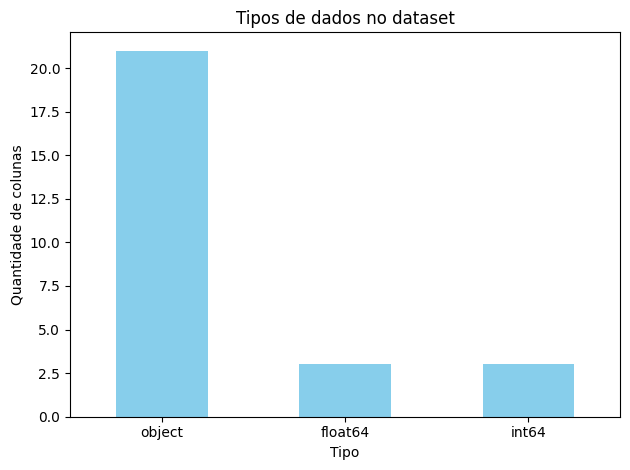


------------------------------------------------------------------------------------------------------------------------------------------------------



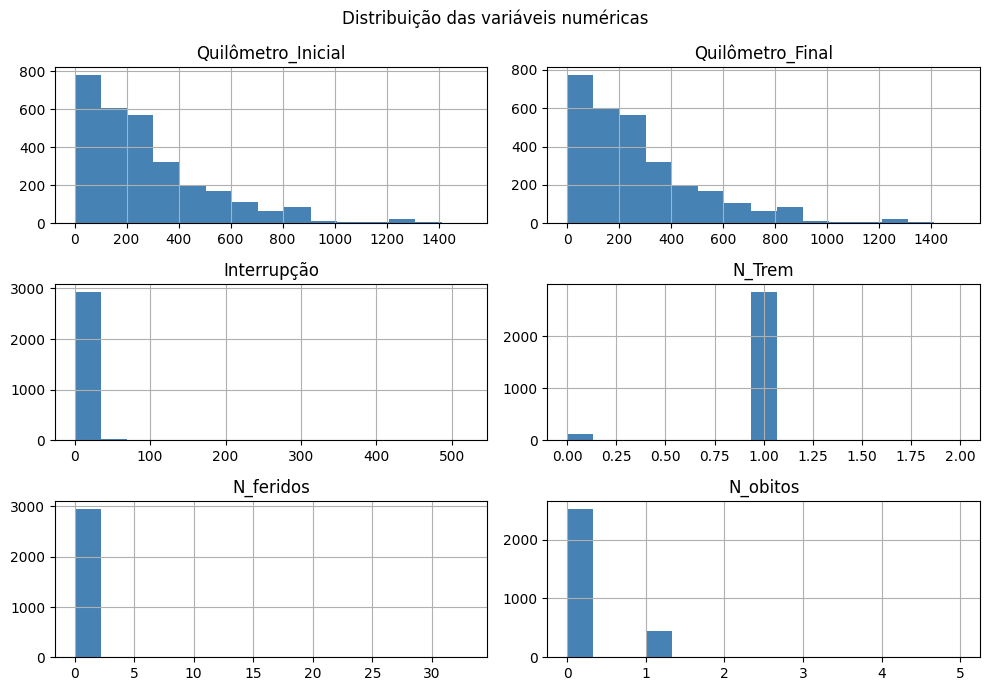


------------------------------------------------------------------------------------------------------------------------------------------------------

Tabela de Valores Nulos por Coluna:

                     Total de Nulos  % de Nulos
Outra_Ferrovia                 2856       96.06
Prejuízo_Financeiro            1815       61.05
Mercadoria                      236        7.94
Equipagem                       127        4.27
Prefixo                         126        4.24
Serviço_Transporte              120        4.04
Double_Stack                    120        4.04
Causa_contibutiva                67        2.25
Quilômetro_Final                 46        1.55


In [ ]:
# Dimensão do dataset
print(f"Total de linhas: {df.shape[0]}")
print(f"Total de colunas: {df.shape[1]}")

print("\n" + "-"*50 + "\n")

# Informações dos tipos de dados
df.info()

print("\n" + "-"*90 + "\n")

# Gráfico de barras com o tipo de dado por coluna
type_counts = df.dtypes.value_counts()

type_counts.plot(kind='bar', color='skyblue')
plt.title('Tipos de dados no dataset')
plt.xlabel('Tipo')
plt.ylabel('Quantidade de colunas')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print("\n" + "-"*150 + "\n")

# Histograma de variáveis numéricas
df.select_dtypes(include=['int64', 'float64']).hist(bins=15,
                 figsize=(10, 7), color='steelblue')
plt.suptitle('Distribuição das variáveis numéricas')
plt.tight_layout()
plt.show()

print("\n" + "-"*150 + "\n")

# Verificação de valores nulos
missing_data = df.isnull().sum().to_frame(name='Total de Nulos')
missing_data['% de Nulos'] = (df.isnull().mean() * 100).round(2)
missing_data = missing_data[missing_data['Total de Nulos'] > 0]
missing_data = missing_data.sort_values(by='Total de Nulos', ascending=False)

print("Tabela de Valores Nulos por Coluna:\n")
print(missing_data)

**Estatísticas Descritivas**

****
A análise descritiva mostra que a variável N_feridos possui uma média de X e desvio padrão de Y, indicando uma variação significativa entre os registros. Já a variável Estado possui 27 valores únicos, sendo SP o mais frequente, com Z ocorrências, o que sugere uma maior concentração de acidentes nesse estado.

Além disso, a coluna Tipo_Carga apresenta alta cardinalidade, com várias categorias distintas, o que pode impactar futuras análises ou classificações. Já colunas como N_obitos têm valores muito baixos na média, indicando que a maioria dos acidentes não resultam em mortes, mas ainda assim há casos extremos (outliers), como indicado pelos valores máximos.
****


Você pode usar frases como:

"A análise estatística revelou que os acidentes com maior número de feridos são raros, mas impactantes, como mostrado pelo desvio padrão elevado da variável N_feridos. A maioria dos registros possui valores próximos a zero. Já Interrupção apresenta uma mediana baixa, mas com valores máximos muito altos, sugerindo que alguns acidentes causam longos períodos sem operação.

Em relação às variáveis categóricas, o estado de São Paulo é o mais recorrente nos acidentes, e determinadas concessionárias concentram maior número de eventos. Essas informações são fundamentais para investigar fatores de risco específicos por região ou operador ferroviário."

In [ ]:
# Estatísticas descritivas
#display(df.describe(include='all'))
#df.describe(include='all')
# Armazena a descrição em uma variável
#desc = df.describe(include='all').transpose()

# Ajusta a visualização para mostrar todas as colunas no terminal
#with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.width', 1000):
    #print("Estatísticas descritivas por coluna:\n")
    #print(desc)
# Apenas variáveis numéricas
print("\nEstatísticas - Variáveis Numéricas:\n")
print(df.describe(include=[np.number]).transpose())

# Apenas variáveis categóricas
print("\nEstatísticas - Variáveis Categóricas:\n")
print(df.describe(include=['object']).transpose())




Estatísticas - Variáveis Numéricas:

                     count        mean         std  min      25%      50%       75%     max
Quilômetro_Inicial  2973.0  277.398091  252.120316  0.0  98.0890  219.326  375.0000  1512.0
Quilômetro_Final    2927.0  276.695156  251.894582  0.0  97.6545  219.801  374.3505  1512.9
Interrupção         2973.0    4.124285   12.384543  0.0   0.1000    1.100    3.2000   521.0
N_Trem              2973.0    0.960309    0.198680  0.0   1.0000    1.000    1.0000     2.0
N_feridos           2973.0    0.337370    0.936873  0.0   0.0000    0.000    1.0000    33.0
N_obitos            2973.0    0.154053    0.374778  0.0   0.0000    0.000    0.0000     5.0

Estatísticas - Variáveis Categóricas:

                    count unique                                                                                           top  freq
Gravidade            2973      2                                                                                           Não  1596
Concessionar